In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
stream_views_df = pd.read_csv("../data/content_views_raw.csv", header=0)
stream_views_df.head()

,USERID,CARDID,CARDTITLE,STREAMID,STREAMNAME,TIMESTAMP,MODULEID,MODULENAME
0,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
1,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
2,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
3,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?
4,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?


In [13]:
stream_views_df["date"] = stream_views_df["TIMESTAMP"].apply(lambda x: x.split(" ")[0].strip())
stream_views_df["time"] = stream_views_df["TIMESTAMP"].apply(lambda x: x.split(" ")[1].strip())
stream_views_df = stream_views_df.drop("TIMESTAMP", axis=1)
stream_views_df.head()

,USERID,CARDID,CARDTITLE,STREAMID,STREAMNAME,MODULEID,MODULENAME,date,time
0,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,430,2. WHAT IS ENGINE OIL MADE OF?,31-05-2017,01:14
1,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,430,2. WHAT IS ENGINE OIL MADE OF?,31-05-2017,01:14
2,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,430,2. WHAT IS ENGINE OIL MADE OF?,31-05-2017,01:14
3,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,430,2. WHAT IS ENGINE OIL MADE OF?,31-05-2017,01:15
4,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,430,2. WHAT IS ENGINE OIL MADE OF?,31-05-2017,01:15


### 1. Group by the date and count the number of views on that day
### 2. Perform at the level of the specific user and the level of all the users over the organization
### 3. Forecast the values for the specific user and the organization using time-series fore-casting

In [14]:
stream_views_by_date_df = stream_views_df.groupby("date").size().reset_index()
stream_views_by_date_df.columns = ["date", "num_views"]
stream_views_by_date_df.head()

,date,num_views
0,01-01-2018,3
1,01-02-2017,990
2,01-02-2018,292
3,01-03-2017,92
4,01-04-2017,235


In [15]:
stream_views_by_date_df['date'] = pd.to_datetime(stream_views_by_date_df['date'], format="%d-%m-%Y")
stream_views_by_date_df = stream_views_by_date_df.sort_values(by="date")

In [16]:
stream_views_by_date_df.head()

,date,num_views
348,2016-05-18,271
368,2016-05-19,86
388,2016-05-20,130
427,2016-05-22,41
448,2016-05-23,1


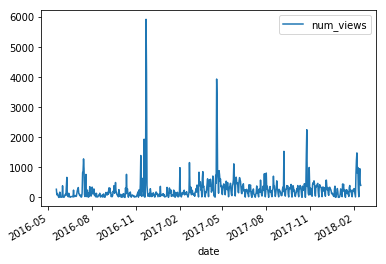

In [17]:
stream_views_by_date_df.plot(x='date', y='num_views')

In [19]:
start_date = stream_views_by_date_df["date"].values[0]
start_date

numpy.datetime64('2016-05-18T00:00:00.000000000')

In [21]:
def getSequence(date_str):
    month = int(date_str[3:5])
    year = int(date_str[6:])
    
    if year == 2016:
        return month - 4
    elif year == 2017:
        return 8 + month
    else:
        return 20 + month

In [22]:
stream_views_df["SequenceNumber"] = stream_views_df["date"].apply(getSequence)

In [23]:
stream_views_df.head()

,USERID,CARDID,CARDTITLE,STREAMID,STREAMNAME,MODULEID,MODULENAME,date,time,SequenceNumber
0,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,430,2. WHAT IS ENGINE OIL MADE OF?,31-05-2017,01:14,13
1,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,430,2. WHAT IS ENGINE OIL MADE OF?,31-05-2017,01:14,13
2,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,430,2. WHAT IS ENGINE OIL MADE OF?,31-05-2017,01:14,13
3,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,430,2. WHAT IS ENGINE OIL MADE OF?,31-05-2017,01:15,13
4,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,430,2. WHAT IS ENGINE OIL MADE OF?,31-05-2017,01:15,13


In [24]:
stream_views_by_month_df = stream_views_df.groupby("SequenceNumber").size().reset_index()
stream_views_by_month_df.columns = ["SequenceNumber", "total_num_views"]
stream_views_by_month_df.head()

,SequenceNumber,total_num_views
0,1,1270
1,2,2064
2,3,7883
3,4,2771
4,5,4493


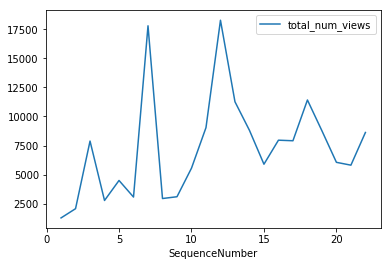

In [25]:
stream_views_by_month_df.plot(x='SequenceNumber', y='total_num_views')